# Práctica 1: Reglas de Asociación

Vamos a seguir la metodología CRISP-DM para la correcta resolución del problema.

## 1. Comprensión del negocio

El objetivo es encontrar patrones de compra en un supermercado para entender cómo los productos se compran juntos. Esto puede ayudar en la disposición de los productos, en las promociones cruzadas, y en mejorar la experiencia de compra de los clientes.

## 2. Comprensión de los datos

 Nuestro dataset se trata de transacciones de un supermercado, donde cada fila representa los productos comprados en una transacción individual.

Importamos todas las librerías que vamos a necesitar a lo largo de la práctica

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

C:\Users\Rubén\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Rubén\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\Rubén\AppData\Local\Temp\ipykernel_4684\2459337081.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pan

In [2]:
df = pd.read_csv("Market_Basket_Optimisation.csv", sep = ",")

In [3]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


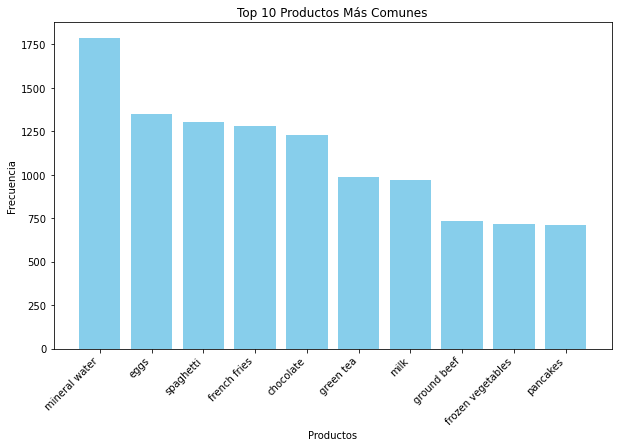

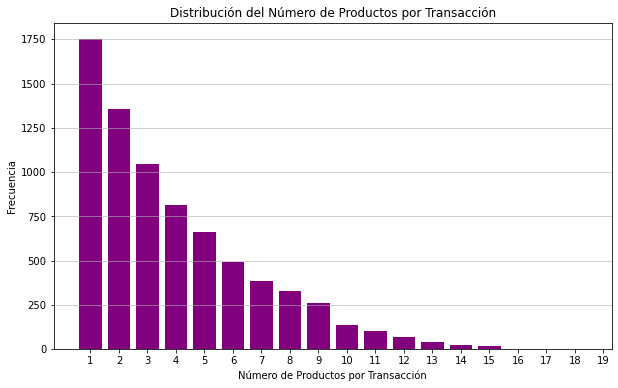

In [4]:
transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

contador = Counter([item for sublist in transactions for item in sublist])

productos_comunes = contador.most_common(10)
products, frequencies = zip(*productos_comunes)

plt.figure(figsize=(10, 6))
plt.bar(products, frequencies, color='skyblue')
plt.xlabel('Productos')
plt.ylabel('Frecuencia')
plt.title('Top 10 Productos Más Comunes')
plt.xticks(rotation=45, ha="right")
plt.show()

num_productos_transaccion = [len(transaction) for transaction in transactions]

plt.figure(figsize=(10, 6))
plt.hist(num_productos_transaccion, bins=np.arange(1, max(num_productos_transaccion)+1)-0.5, color='purple', rwidth=0.8)
plt.xlabel('Número de Productos por Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Productos por Transacción')
plt.xticks(np.arange(1, max(num_productos_transaccion)+1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [5]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

transactions_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
k1 = apriori(transactions_df, min_support=0.015, use_colnames=True, max_len=1)

k1.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.033733,(brownies)
3,0.087200,(burgers)
4,0.030133,(butter)


In [7]:
k2 = apriori(transactions_df, min_support=0.015, use_colnames=True, max_len=2)

k2.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.033733,(brownies)
3,0.087200,(burgers)
4,0.030133,(butter)


In [8]:
frequent_itemsets = apriori(transactions_df, min_support=0.015, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020267,(almonds),1
1,0.033200,(avocado),1
2,0.033733,(brownies),1
3,0.087200,(burgers),1
4,0.030133,(butter),1
...,...,...,...
147,0.020933,"(spaghetti, tomatoes)",2
148,0.016533,"(turkey, spaghetti)",2
149,0.015867,"(spaghetti, chocolate, mineral water)",3
150,0.017067,"(ground beef, spaghetti, mineral water)",3


In [9]:
reglas = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

reglas_alta_confianza = reglas[reglas['confidence'] > 0.35]

antecedentes = reglas_alta_confianza['antecedents'].apply(lambda x: list(x)).tolist()
consecuentes = reglas_alta_confianza['consequents'].apply(lambda x: list(x)).tolist()

for index, (antecedent, consequent) in enumerate(zip(antecedentes, consecuentes)):
    print(f"Regla {index + 1}: Antecedente: {antecedent} => Consecuente: {consequent}")
reglas_alta_confianza

Regla 1: Antecedente: ['chicken'] => Consecuente: ['mineral water']
Regla 2: Antecedente: ['cooking oil'] => Consecuente: ['mineral water']
Regla 3: Antecedente: ['frozen vegetables'] => Consecuente: ['mineral water']
Regla 4: Antecedente: ['ground beef'] => Consecuente: ['mineral water']
Regla 5: Antecedente: ['ground beef'] => Consecuente: ['spaghetti']
Regla 6: Antecedente: ['milk'] => Consecuente: ['mineral water']
Regla 7: Antecedente: ['olive oil'] => Consecuente: ['mineral water']
Regla 8: Antecedente: ['pancakes'] => Consecuente: ['mineral water']
Regla 9: Antecedente: ['salmon'] => Consecuente: ['mineral water']
Regla 10: Antecedente: ['soup'] => Consecuente: ['mineral water']
Regla 11: Antecedente: ['tomatoes'] => Consecuente: ['mineral water']
Regla 12: Antecedente: ['chocolate', 'spaghetti'] => Consecuente: ['mineral water']
Regla 13: Antecedente: ['spaghetti', 'ground beef'] => Consecuente: ['mineral water']
Regla 14: Antecedente: ['ground beef', 'mineral water'] => Consec

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602,0.396790
48,(cooking oil),(mineral water),0.051067,0.238267,0.020133,0.394256,1.654683,0.007966,1.257517,0.416947
89,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
111,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
113,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
120,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789
132,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
134,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,0.011082,1.180687,0.363034
136,(salmon),(mineral water),0.042400,0.238267,0.016933,0.399371,1.676152,0.006831,1.268226,0.421257
138,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458


## Conclusiones obtenidas de las reglas

$\textbf{Pollo y Agua Mineral}$

- Análisis: Hay una tendencia del 38% de que los clientes que compran pollo también comprarán agua mineral.
    
- Acción de Product Placement: Considera ubicar el pollo y el agua mineral en secciones contiguas.

- Acción de Marketing: Crea paquetes combinados de pollo y agua mineral o ofrece descuentos al comprar ambos.

$\textbf{Aceite de Cocina y Agua Mineral}$

- Análisis: Los compradores de aceite de cocina tienen una probabilidad del 39% de llevar también agua mineral.
- Acción de Product Placement: Alinea el aceite de cocina con el agua mineral, quizás en un corredor de ingredientes esenciales.
- Acción de Marketing: Diseña recetas que usen ambos productos y distribúyelas en la sección de aceite de cocina.

$\textbf{Verduras Congeladas y Agua Mineral}$

- Análisis: Quienes compran verduras congeladas tienen un 37% de posibilidad de comprar agua mineral.
- Acción de Product Placement: Coloca cerca las verduras congeladas y el agua mineral, sugiriendo una comida rápida y saludable.
- Acción de Marketing: Ofrece promociones de "cena saludable" que incluyan ambos productos.

$\textbf{Carne de Res y Agua Mineral}$

- Análisis: La carne de res muestra un vínculo con la compra de agua mineral en un 42% de los casos.
- Acción de Product Placement: Crea una sección de "barbacoa" que incluya carne de res y agua mineral como bebida refrescante.
- Acción de Marketing: Organiza eventos de barbacoa en la tienda promocionando estos productos.

$\textbf{Carne de Res y Spaghetti}$

- Análisis: Existe una fuerte correlación entre comprar carne de res y comprar spaghetti, con una confianza del 64%.
- Acción de Product Placement: Coloca la carne de res cerca de los pasillos de pasta para promover la idea de platos de carne y spaghetti.
- Acción de Marketing: Sugerencias de recetas de spaghetti boloñesa o promociones cruzadas en ambas secciones.

$\textbf{Leche y Agua Mineral}$

- Análisis: La leche tiene una asociación del 37% con la compra de agua mineral.
- Acción de Product Placement: Aunque no es intuitivo, considera poner señalización que dirija a los clientes de la sección de lácteos al agua mineral.
- Acción de Marketing: Haz ofertas de descuento por la compra de ambos o incluye agua mineral gratis con una cantidad determinada de compra de leche.

$\textbf{Aceite de Oliva y Agua Mineral}$

- Análisis: Los clientes que adquieren aceite de oliva incluyen agua mineral un 42% de las veces.
- Acción de Product Placement: Ubica estos dos productos en una sección de alimentos saludables.
- Acción de Marketing: Promociona un estilo de vida saludable que incorpore ambos productos en la dieta diaria.

$\textbf{Pancakes y Agua Mineral}$

- Análisis: Un 35% de los clientes que compran masa para pancakes también adquieren agua mineral.
- Acción de Product Placement: Agrupa los ingredientes para el desayuno junto con el agua mineral para promover una mañana completa.
- Acción de Marketing: Ofrece kits de desayuno que incluyan masa para pancakes y agua mineral.

$\textbf{Sopa y Agua Mineral}$

- Análisis: La sopa muestra una relación del 46% con la compra de agua mineral.
- Acción de Product Placement: Coloca sopas instantáneas y agua mineral juntas para alentar las ventas como una comida completa.
- Acción de Marketing: Crea promociones de "comida reconfortante" que incluyan ambos productos.

$\textbf{Tomates y Agua Mineral}$

- Análisis: Los clientes que compran tomates tienen un 36% de probabilidad de comprar también agua mineral.
- Acción de Product Placement: Pon los tomates cerca de lasección de agua mineral o al revés, especialmente si los tomates están cerca de otros ingredientes frescos.
- Acción de Marketing: Sugerir ensaladas o salsas caseras en las promociones, destacando la importancia de la hidratación con agua mineral.

$\textbf{Chocolate, Spaghetti y Agua Mineral}$

- Análisis: Esta combinación inesperada tiene una confianza del 41%.
- Acción de Product Placement: Aunque no es una combinación típica, podrías ubicar estratégicamente los chocolates cerca de la pasta y el agua, quizás como parte de una "experiencia gastronómica" en tu tienda.
- Acción de Marketing: Considera paquetes de regalo que incluyan estos tres productos, ideal para los amantes de la cocina.

$\textbf{Carne de Res, Agua Mineral y Spaghetti}$

- Análisis: La presencia de carne de res y agua mineral aumenta la probabilidad de que los clientes también elijan spaghetti (confianza del 61%).
- Acción de Product Placement: Asegúrate de que el agua mineral esté visible tanto desde la sección de carnes como desde la sección de pastas.
- Acción de Marketing: Ofrece un descuento en spaghetti cuando se compra carne de res y agua mineral, o viceversa, para fomentar la venta cruzada.

$\textbf{Carne de Res, Spaghetti y Agua Mineral}$

- Análisis: Similar a la regla anterior, esta tiene una confianza del 47%.
- Acción de Product Placement: Mantén la consistencia con la disposición de los productos como se mencionó anteriormente.
- Acción de Marketing: Podrías promover una "oferta de cena" que incluya estos tres elementos, potencialmente agregando un cuarto elemento gratis o con descuento.

$\textbf{Leche, Spaghetti y Agua Mineral}$

- Análisis: Cuando los clientes compran leche y spaghetti, también tienden a comprar agua mineral un 44% de las veces.
- Acción de Product Placement: Considera ubicar la leche cerca de la sección de pasta y no muy lejos del agua mineral.
- Acción de Marketing: Potencia la idea de que la leche y el agua mineral son compras esenciales, quizás ofreciendo recetas que usen leche en la preparación de platos de pasta.

# Visualización de los resultados

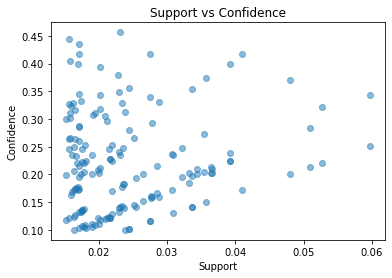

In [10]:
plt.scatter(reglas['support'], reglas['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

Soporte (eje X): Mide la proporción de transacciones en la base de datos que contienen tanto el antecedente como el consecuente de la regla. Valores más bajos en el eje X indican que la combinación de productos es menos frecuente.

Confianza (eje Y): Mide la probabilidad de que, cuando se compra el antecedente, también se compra el consecuente. Los valores más altos en el eje Y indican una mayor probabilidad de que esta combinación de productos sea comprada juntos.

La mayoría de las reglas tienen un soporte inferior al 0.06, lo que sugiere que no hay muchas combinaciones de productos que ocurran en una gran proporción de todas las transacciones.
La confianza varía bastante, oscilando entre aproximadamente 0.1 y 0.45. Esto significa que algunas de las combinaciones de productos, aunque no son muy frecuentes, tienen una probabilidad relativamente alta de ser compradas juntas cuando se compra el antecedente.
No hay una tendencia clara que indique una relación directa entre el soporte y la confianza. Es decir, las reglas con mayor soporte no necesariamente tienen mayor confianza y viceversa.

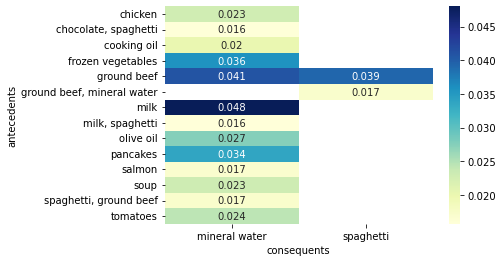

In [11]:
reglas_alta_confianza.loc[:, 'antecedents'] = reglas_alta_confianza['antecedents'].apply(lambda x: ', '.join(list(x)))
reglas_alta_confianza.loc[:, 'consequents'] = reglas_alta_confianza['consequents'].apply(lambda x: ', '.join(list(x)))

pivot = reglas_alta_confianza.pivot(index='antecedents', columns='consequents', values='support')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.show()

- Las combinaciones de "carne de res y agua mineral" y "leche y agua mineral" tienen los mayores valores de soporte, como lo indica el color más oscuro de sus celdas.
- Otros productos como "verduras congeladas y agua mineral" y "tomates y agua mineral" también presentan un soporte relativamente alto.
- "Spaghetti y carne de res" junto con "spaghetti y chocolate" tienen valores de soporte más bajos, indicados por colores más claros.